In [1]:
import duckdb
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from ipywidgets import interact
import numpy as np
import json
import ast

In [2]:
df = pd.read_csv('/Users/mohammed/code/proton-deuterium-data/data/csv/random1000.csv')

In [3]:
# import duckdb

# # Set memory limit in DuckDB
# duckdb.sql("SET memory_limit='1GB';")  # Adjust to available RAM

# # Convert CSV to Parquet using streaming (limits RAM usage)
# duckdb.sql("""
#     COPY (
#         SELECT * FROM read_csv_auto('/Users/mohammed/code/proton-deuterium-data/data/root/all_events.csv', all_varchar=True)
#     ) TO '/Users/mohammed/code/proton-deuterium-data/data/all_events.parquet' (FORMAT PARQUET);
# """)

In [4]:
df["hit_x"] = df["hit_x"].apply(ast.literal_eval)
df["hit_y"] = df["hit_y"].apply(ast.literal_eval)
df["hit_z"] = df["hit_z"].apply(ast.literal_eval)
df["hit_charge"] = df["hit_charge"].apply(ast.literal_eval)

df.head()

,run,subrun,event,p,m,beamline_mass,hit_x,hit_y,hit_z,hit_charge
0,8675,144,15489,0,0,1147.5700,"[-999, -999, -999, -999, -999, -999, -999, -99...","[-999, -999, -999, -999, -999, -999, -999, -99...","[-999, -999, -999, -999, -999, -999, -999, -99...","[3459.23, 1174.15, 4384.93, 21680.3, 953.41, 1..."
1,8766,16,2015,1,0,-37.3223,"[-999, -999, -999, -999, -999, -999, -999, -99...","[-999, -999, -999, -999, -999, -999, -999, -99...","[-999, -999, -999, -999, -999, -999, -999, -99...","[2079.41, 1158.16, 1851.19, 1213.91, 945.338, ..."
2,8766,29,3710,1,0,-51.9785,"[-999, -999, -999, -999, -999, -999, -999, -99...","[-999, -999, -999, -999, -999, -999, -999, -99...","[-999, -999, -999, -999, -999, -999, -999, -99...","[1734.64, 13083.3, 2152.69, 1525.55, 1764.74, ..."
3,8766,50,6419,0,1,198.8800,"[-999, -999, -999, -999, -999, -999, -999, -99...","[-999, -999, -999, -999, -999, -999, -999, -99...","[-999, -999, -999, -999, -999, -999, -999, -99...","[4112.08, 14276.3, 1591.05, 4473.38, 11141.5, ..."
4,8766,77,9786,1,1,118.3260,"[-999, -999, -999, -999, -999, -999, -999, -99...","[-999, -999, -999, -999, -999, -999, -999, -99...","[-999, -999, -999, -999, -999, -999, -999, -99...","[115.584, 104.764, 192.189, 805.401, 293.634, ..."


In [5]:
df = df[(df['beamline_mass'] > 0)].reset_index(drop=True)

In [6]:
df = df.sort_values(by="beamline_mass").reset_index(drop=True)
df

,run,subrun,event,p,m,beamline_mass,hit_x,hit_y,hit_z,hit_charge
0,8681,12,1661,1,0,12.0430,"[26.7958, 26.7598, 26.6892, 26.6235, 26.5568, ...","[16.7901, 16.0195, 14.5101, 13.1067, 11.6814, ...","[14.5325, 14.3296, 13.9321, 13.5625, 13.1871, ...","[1233.8, 653.229, 1765.05, 1592.37, 2173.22, 3..."
1,9474,124,10562,0,0,14.9565,"[34.6195, 34.2991, 33.9737, 33.6866, 33.298, 3...","[-5.08961, -5.79772, -6.51663, -7.15112, -8.00...","[17.3751, 17.4239, 17.4735, 17.5172, 17.5764, ...","[3572.54, 320.47, 3492.09, 661.909, 2501.87, 4..."
2,8686,412,43342,0,1,15.6203,"[-999, -999, -999, 26.6373, 26.5987, 26.56, 26...","[-999, -999, -999, 3.79181, 3.79074, 3.78966, ...","[-999, -999, -999, 3.09077, 3.55144, 4.0125, 4...","[89.4406, 120.148, 418.515, 1741.7, 68.4228, 9..."
3,9451,51,4594,0,0,15.6528,"[-999, -999, -999, -999, -999, -999, -999, -99...","[-999, -999, -999, -999, -999, -999, -999, -99...","[-999, -999, -999, -999, -999, -999, -999, -99...","[2464.48, 1741.32, 1778.55, 1981.02, 1851.21, ..."
4,8562,294,13641,0,1,18.7024,"[-999, -999, -999, -999, -999, -999, 28.6348, ...","[-999, -999, -999, -999, -999, -999, 2.0592, 2...","[-999, -999, -999, -999, -999, -999, 87.0757, ...","[596.098, 1348.85, 2331.43, 2296.16, 2411.52, ..."
...,...,...,...,...,...,...,...,...,...,...
797,9473,415,35492,0,0,2244.2500,"[47.3009, 47.2259, 47.0814, 47.0251, 46.9691, ...","[5.21029, 5.38534, 5.73268, 5.91677, 6.10014, ...","[10.0151, 10.5679, 11.6611, 12.2222, 12.781, 1...","[4758.04, 1523.06, 1691.56, 3839.32, 1377.9, 1..."
798,8686,254,26509,0,1,2327.9200,"[-999, -999, -999, -999, -999, -999, -999, -99...","[-999, -999, -999, -999, -999, -999, -999, -99...","[-999, -999, -999, -999, -999, -999, -999, -99...","[3572.63, 310.01, 11631.2, 639.143, 914.508, 7..."
799,8638,241,25608,0,0,3056.0300,"[-999, -999, -999, -999, -999, -999, 19.3397, ...","[-999, -999, -999, -999, -999, -999, 2.98386, ...","[-999, -999, -999, -999, -999, -999, 3.08844, ...","[2643.23, 3165.95, 2407.62, 2157.38, 1769.03, ..."
800,8686,348,36554,0,0,5224.1000,"[7.73199, 7.71647, 7.70101, 7.68552, 7.67002, ...","[0.974961, 0.963024, 0.951129, 0.939213, 0.927...","[4.69883, 5.1542, 5.60796, 6.0625, 6.51727, 6....","[1991.36, 2314.84, 2450.11, 2662.29, 8705.17, ..."


In [7]:
def plot_event(event_index):
    # Select the event (row) by index
    row = df.iloc[event_index]
    
    # Convert the string representations of the hit arrays into actual Python lists
    # (Assumes the arrays are stored like "[1.2, 3.4, ...]")
    hit_x = np.array(row['hit_x']) 
    hit_z = np.array(row['hit_z'])
    hit_charge = np.array(row['hit_charge'])
    
    # Filter out invalid values (e.g. where hit_x == -999)
    mask = (hit_x != -999) & (hit_z != -999) & (hit_charge != -999)
    hit_x = hit_x[mask]
    hit_z = hit_z[mask]
    hit_charge = hit_charge[mask]
    
    # Optional: define margins for plotting so points don’t hug the plot edge
    if hit_x.size > 0 and hit_z.size > 0:
        x_min, x_max = hit_x.min(), hit_x.max()
        z_min, z_max = hit_z.min(), hit_z.max()
        x_margin = 0.1 * (x_max - x_min) if x_max > x_min else 1.0
        z_margin = 0.1 * (z_max - z_min) if z_max > z_min else 1.0
        xrange = (x_min - x_margin, x_max + x_margin)
        zrange = (z_min - z_margin, z_max + z_margin)
    else:
        xrange = (-100, 100)
        zrange = (-100, 100)
    
    # Create the 2D histogram
    plt.figure(figsize=(12, 10))
    plt.hist2d(hit_x, hit_z, bins=128, range=(xrange, zrange),
               weights=hit_charge, cmap='viridis')
    plt.colorbar(label='Hit Charge')
    plt.xlabel('Hit X')
    plt.ylabel('Hit Z')
    plt.title(f'Event {row["event"]} (Run {row["run"]}, Subrun {row["subrun"]}) - Beamline Mass: {row["beamline_mass"]:.2f} GeV/c^2')
    plt.show()


interact(plot_event, event_index=(0, len(df)-1));


interactive(children=(IntSlider(value=400, description='event_index', max=801), Output()), _dom_classes=('widg…

In [ ]:
# FIGURE OUT SCALES - hits, charge
# 1D CNNs


run                 8613
subrun               152
event              10600
p                      0
m                      0
beamline_mass    131.614
hit_x                 []
hit_y                 []
hit_z                 []
hit_charge            []
Name: 569, dtype: object

In [ ]:
# TRAJECTORY 

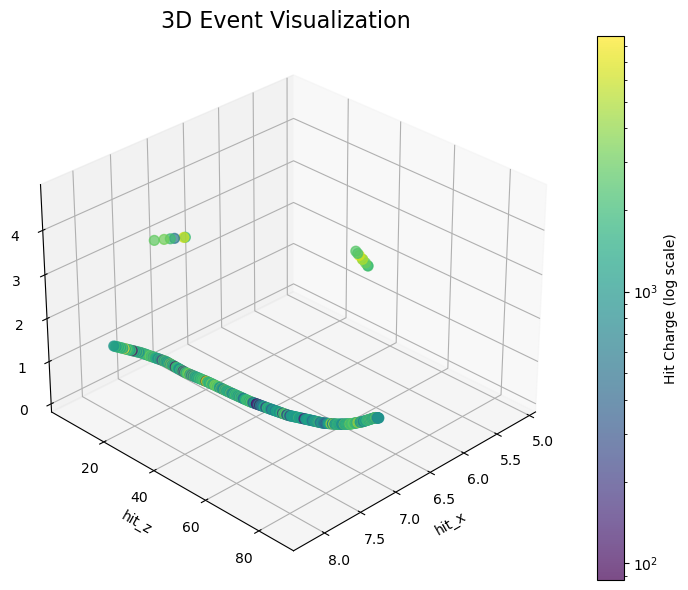

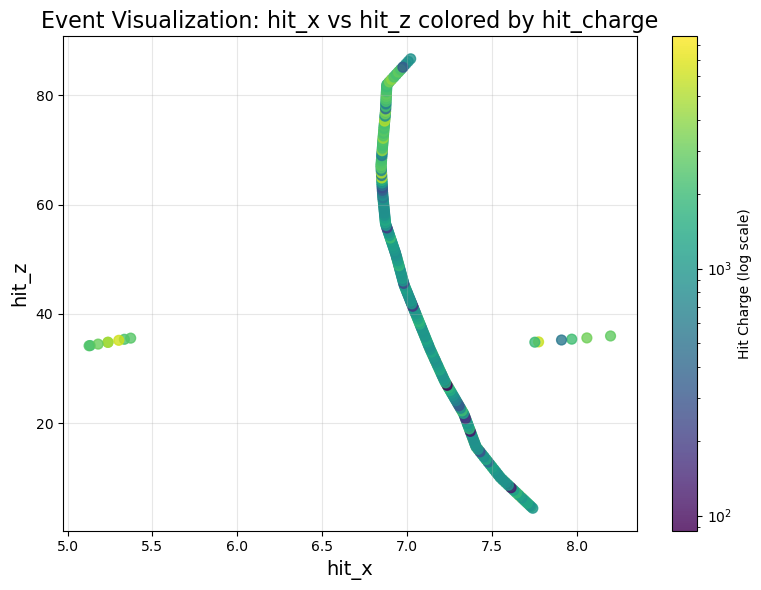

In [133]:
event = 800

# Convert the data to numpy arrays
hit_x_raw = np.array(df.loc[event]["hit_x"])
hit_y_raw = np.array(df.loc[event]["hit_y"])
hit_z_raw = np.array(df.loc[event]["hit_z"])
hit_charge_raw = np.array(df.loc[event]["hit_charge"])

# Filter out the -999 values (invalid data)
valid_indices = (hit_x_raw != -999) & (hit_y_raw != -999) & (hit_z_raw != -999)
hit_x = hit_x_raw[valid_indices]
hit_y = hit_y_raw[valid_indices]
hit_z = hit_z_raw[valid_indices]
hit_charge = hit_charge_raw[valid_indices]

# Create a DataFrame for easy manipulation
df_ = pd.DataFrame({
    'hit_x': hit_x,
    'hit_y': hit_y,
    'hit_z': hit_z,
    'hit_charge': hit_charge
})

# Create visualization functions
def plot_event_heatmap(df, figsize=(8, 6)):
    """
    Creates a scatter plot with hit_x vs hit_z, colored by hit_charge
    """
    fig, ax = plt.subplots(figsize=figsize)
    
    # Create a scatter plot with color based on charge (using logarithmic scale for better visibility)
    scatter = ax.scatter(df['hit_x'], df['hit_z'], 
                         c=df['hit_charge'], 
                         cmap='viridis',  # Blue-green-yellow colormap
                         norm=LogNorm(vmin=df['hit_charge'].min(), vmax=df['hit_charge'].max()),
                         s=50,  # Size of points
                         alpha=0.8)  # Transparency
    
    # Add a colorbar
    cbar = plt.colorbar(scatter, ax=ax, label='Hit Charge (log scale)')
    
    # Add labels and title
    ax.set_xlabel('hit_x', fontsize=14)
    ax.set_ylabel('hit_z', fontsize=14)
    ax.set_title('Event Visualization: hit_x vs hit_z colored by hit_charge', fontsize=16)
    
    # Add grid
    ax.grid(True, alpha=0.3)
    
    # Adjust layout
    plt.tight_layout()
    
    return fig, ax

def create_hexbin_plot(df, figsize=(12, 10), gridsize=30):
    """
    Creates a hexbin plot which is useful for dense datasets
    """
    fig, ax = plt.subplots(figsize=figsize)
    
    # Create hexbin plot - bins data into hexagons and colors them by charge
    hb = ax.hexbin(df['hit_x'], df['hit_z'], 
                  C=df['hit_charge'],
                  gridsize=gridsize,  # Number of hexagons in the grid
                  cmap='viridis',
                  norm=LogNorm(vmin=df['hit_charge'].min(), vmax=df['hit_charge'].max()),
                  mincnt=1)  # Minimum counts in a bin for it to be displayed
    
    # Add a colorbar
    cbar = plt.colorbar(hb, ax=ax, label='Sum of Hit Charge in bin (log scale)')
    
    # Add labels and title
    ax.set_xlabel('hit_x', fontsize=14)
    ax.set_ylabel('hit_z', fontsize=14)
    ax.set_title('Event Visualization: hit_x vs hit_z (Hexbin plot)', fontsize=16)
    
    # Add grid
    ax.grid(True, alpha=0.3)
    
    # Adjust layout
    plt.tight_layout()
    
    return fig, ax

def plot_3d_event(df, figsize=(8, 6)):
    """
    Creates a 3D visualization of the event
    """
    from mpl_toolkits.mplot3d import Axes3D
    
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111, projection='3d')
    
    # Create scatter plot with size proportional to charge
    scatter = ax.scatter(df['hit_x'], 
                        df['hit_z'], 
                        df['hit_y'],  # Using charge as z-coordinate
                        c=df['hit_charge'],  # Color by charge
                        cmap='viridis',
                        norm=LogNorm(vmin=df['hit_charge'].min(), vmax=df['hit_charge'].max()),
                        s=50,  # Size of points
                        alpha=0.7)  # Transparency
    
    # Add a colorbar
    cbar = plt.colorbar(scatter, ax=ax, label='Hit Charge (log scale)')
    
    # Add labels
    ax.set_xlabel('hit_x')
    ax.set_ylabel('hit_z')
    ax.set_zlabel('hit_y')
    ax.set_title('3D Event Visualization', fontsize=16)
    
    # Adjust viewing angle
    ax.view_init(elev=30, azim=45)
    
    # Adjust layout
    plt.tight_layout()
    
    return fig, ax

# Now generate all the plots
fig1, ax1 = plot_event_heatmap(df_)
# fig2, ax2 = create_hexbin_plot(df_)
fig3, ax3 = plot_3d_event(df_)

# Display the first visualization (the others would be shown in a notebook)
plt.figure(fig1.number)  # Make sure the first figure is active

# You would typically use plt.show() in a script or notebook to display the figures
plt.show()

In [ ]:
event = 800

# Convert the data to numpy arrays
hit_x_raw = np.array(df.loc[event]["hit_x"])
hit_y_raw = np.array(df.loc[event]["hit_y"])
hit_z_raw = np.array(df.loc[event]["hit_z"])
hit_charge_raw = np.array(df.loc[event]["hit_charge"])

# Filter out the -999 values (invalid data)
valid_indices = (hit_x_raw != -999) & (hit_y_raw != -999) & (hit_z_raw != -999)
hit_x = hit_x_raw[valid_indices]
hit_y = hit_y_raw[valid_indices]
hit_z = hit_z_raw[valid_indices]
hit_charge = hit_charge_raw[valid_indices]

mask = (hit_x != -999) & (hit_z != -999) & (hit_charge != -999)
x_valid = hit_x[mask]
z_valid = hit_z[mask]
charge_valid = hit_charge[mask]

x_min, x_max = x_valid.min(), x_valid.max()
z_min, z_max = z_valid.min(), z_valid.max()

x_margin = (x_max - x_min) * 0.1
z_margin = (z_max - z_min) * 0.1

plt.figure(figsize=(10, 8))
plt.hist2d(
    x_valid, z_valid, 
    bins=128, 
    range=((x_min - x_margin, x_max + x_margin), (z_min - z_margin, z_max + z_margin)),
    weights=charge_valid, 
    cmap='viridis'
)
plt.colorbar(label='Sum of Hit Charge')
plt.xlabel('Hit X Position')
plt.ylabel('Hit Z Position')
plt.title(f'2D Histogram of Hit Charge (X vs Z) - {df.loc[event]["beamline_mass"]:.2f} GeV/c^2')
plt.show()